<h2>
Basic Finance
</h2>

<p>
The Python code in this Jupyter notebook demonstrates some basic quantiative
finance code.
</p>
<p>
I have a Masters degree in Computational Finance and Risk Management from the
University of Washington.  In this Masters program we used R.  I also used
R for my Masters degree project (see
<a href="http://bearcave.com/finance/thesis_project/index.html">Value Factors Do Not Forecast Returns for S&P 500 Stocks</a>)
</p>
<p>
For a variety of reasons I am moving from R to Python.  This note book contains some of the
first steps in this journey.
</p>

In [1]:
from typing import List
from pandas_datareader import data
from tabulate import tabulate
import pandas as pd
from pathlib import Path

tickers = ['gs', 'jpm', 'bac']

print("Symbols: " + " ".join(sym + ' ' for sym in tickers))

data_source = 'yahoo'

Symbols: gs  jpm  bac 


<p>
Fetch adjusted daily close prices for the symbols
</p>
<p>
To avoid repeatedly accessing the data source, the close price data is written to a file in /tmp.
This file will be removed when the system is rebooted.
</p>

In [2]:
tempRoot: str = '/tmp/'
tempFileName: str = 'banks.csv'
tempFilePath: str = tempRoot + tempFileName
tempFile = Path(tempFilePath)
fileSize = 0
if tempFile.exists():
    fileSize = tempFile.stat().st_size

if fileSize > 0:
    close_prices = pd.read_csv(tempFilePath, index_col='Date')
else:
    # year-month-day
    start_date = '2019-01-01'
    end_date = '2021-10-05'

    panel_data = data.DataReader(tickers, data_source, start_date, end_date)
    close_prices = panel_data['Adj Close']
    close_prices.to_csv(tempFilePath)

Basic time series statistics

In [3]:
print(tabulate(close_prices.describe(), headers=['Symbols', *tickers], tablefmt="fancy_grid"))

╒═══════════╤══════════╤══════════╤═══════════╕
│ Symbols   │       gs │      jpm │       bac │
╞═══════════╪══════════╪══════════╪═══════════╡
│ count     │ 696      │ 696      │ 696       │
├───────────┼──────────┼──────────┼───────────┤
│ mean      │ 240.461  │ 117.073  │  29.9886  │
├───────────┼──────────┼──────────┼───────────┤
│ std       │  73.6739 │  24.2521 │   6.23185 │
├───────────┼──────────┼──────────┼───────────┤
│ min       │ 131.002  │  74.87   │  17.4691  │
├───────────┼──────────┼──────────┼───────────┤
│ 25%       │ 190.829  │  96.6993 │  25.3222  │
├───────────┼──────────┼──────────┼───────────┤
│ 50%       │ 204.868  │ 108.12   │  27.9751  │
├───────────┼──────────┼──────────┼───────────┤
│ 75%       │ 290.02   │ 135.584  │  33.5886  │
├───────────┼──────────┼──────────┼───────────┤
│ max       │ 417.661  │ 168.66   │  44.22    │
╘═══════════╧══════════╧══════════╧═══════════╛


<h3>
Time series plot
</h3>

<AxesSubplot:xlabel='Date'>

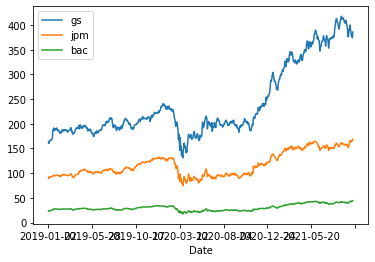

In [4]:
close_prices.plot()

<p>
The previous plot does not allow the prices of the three financial stocks to
be compared because they are on different scales.  Adjusting each stock price
so that it starts at zero allows price increases/decreases for the stocks to
be more easily compared.
</p>

<AxesSubplot:xlabel='Date'>

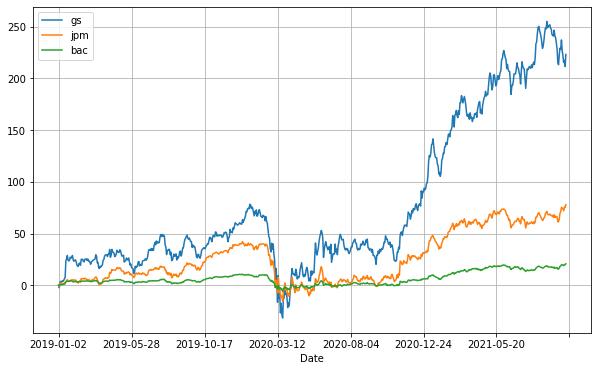

In [5]:
normalized_close_list: List = []
for sym in tickers:
    normalized = close_prices[sym] - close_prices[sym][0]
    normalized_close_list.append(normalized)

normalized_close = pd.DataFrame(normalized_close_list).transpose()

normalized_close.plot(grid=True, figsize=(10,6))

The above plot shows that Goldman Sachs (gs) is a dramatically better investment than either Bank
of America or JP Morgan.